In [1]:
from functions import parse_time_data, save_time_data_info_file, show_heatmap, show_3D_plot, show_bar_chart, show_box_plot

In [2]:
# Read the CSV file into a DataFrame
summary_result_path = "../../exp_results/result_summary.csv"
time_data = parse_time_data(summary_result_path)

In [3]:
save_file_path = "../../exp_results/time_consumption_summary.csv"
save_time_data_info_file(time_data, save_file_path)

In [4]:
# time_data의 'proposed_timeConsumption(us)'의 최대값과 최소값이 있는 row를 찾아서 출력
print(time_data.loc[time_data['proposed_timeConsumption(us)'].idxmax()])
print(time_data.loc[time_data['proposed_timeConsumption(us)'].idxmin()])

numTasks                               12.00
utilization                             0.60
simulator_timeConsumption(us)    95958096.58
proposed_timeConsumption(us)          453.08
Name: 11, dtype: float64
numTasks                               3.00
utilization                            0.60
simulator_timeConsumption(us)    1256348.74
proposed_timeConsumption(us)         329.60
Name: 2, dtype: float64


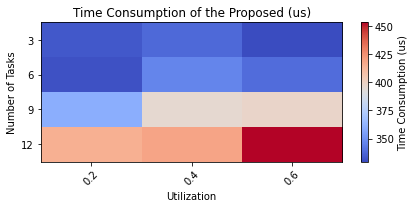

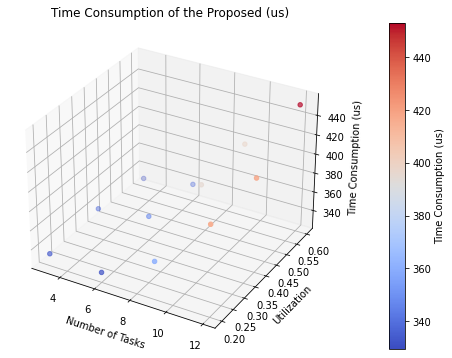

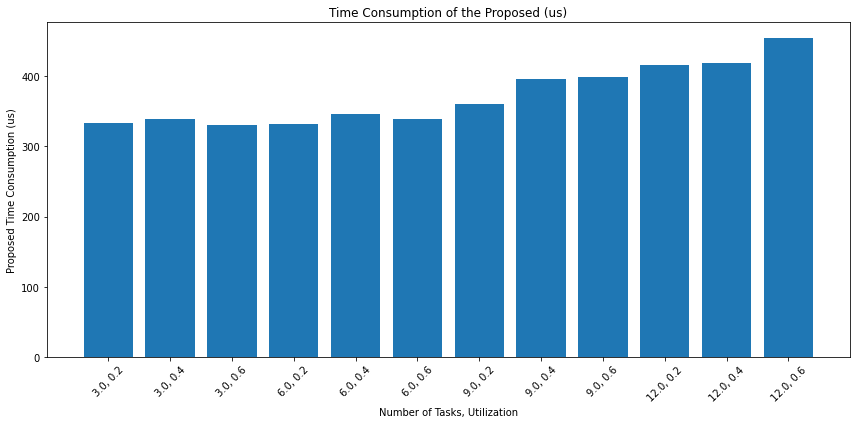

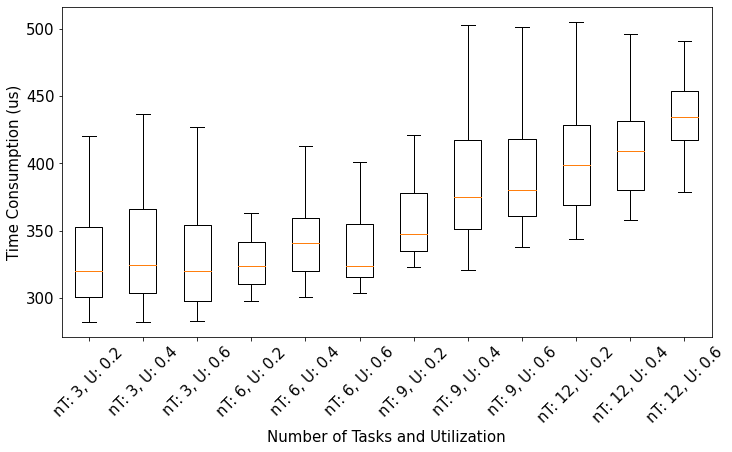

In [5]:
# visualize the time consumption of the proposed algorithm
values = "proposed_timeConsumption(us)"
title = 'Time Consumption of the Proposed (us)'
show_heatmap(time_data, values, title)
show_3D_plot(time_data, time_data[values], title)
show_bar_chart(time_data, values, title)
show_box_plot(summary_result_path, values, title, 15)

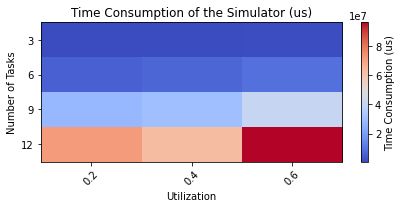

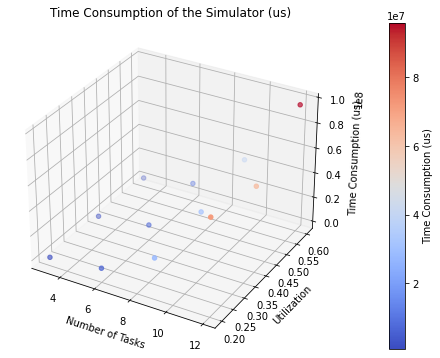

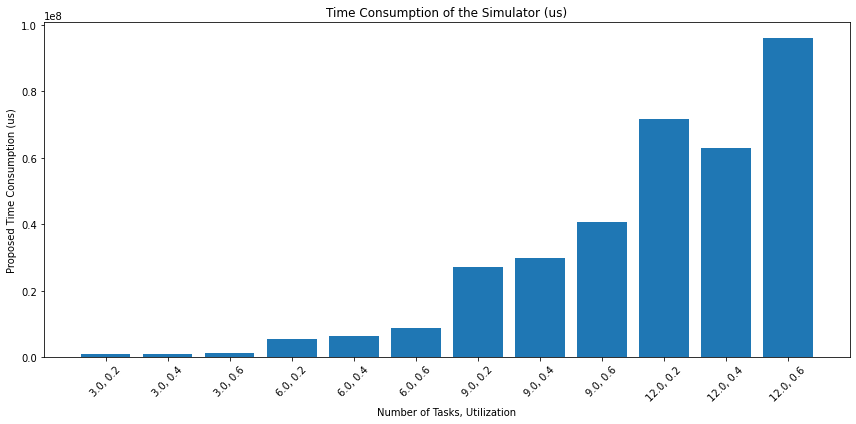

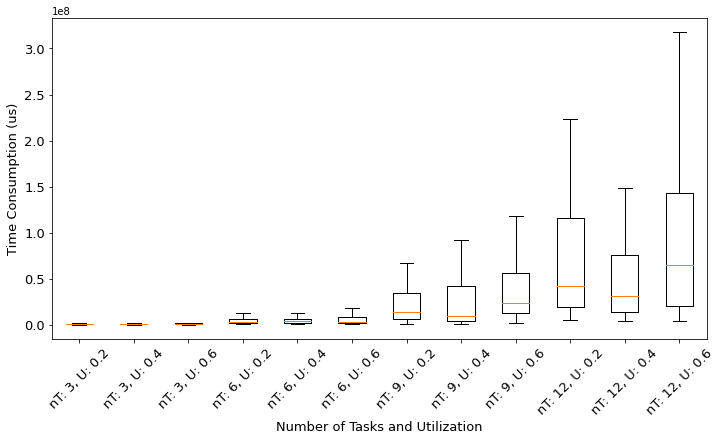

In [6]:
# visualize the time consumption of the simulator
values = 'simulator_timeConsumption(us)'
title = 'Time Consumption of the Simulator (us)'
show_heatmap(time_data, values, title)
show_3D_plot(time_data, time_data[values], title)
show_bar_chart(time_data, values, title)
show_box_plot(summary_result_path, values, title, 13)